In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
#plotting the best parameters
import matplotlib.patches as mpatches


from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.metrics import roc_curve
import numpy as np

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [2]:
path = '/Ml files/cyberbully detection/'

In [3]:
df = pd.read_csv(path + "dataset/experimental_dataset.csv")
df.head()

,Text,aggressive_label,attack_label,toxicity_label,sexism_recism_label,acceptable
0,creative dictionary definitions terms insuranc...,0.0,0.0,0.0,0.0,1.0
1,ummm article uses imperial measurements si one...,0.0,0.0,0.0,0.0,1.0
2,disagree would leave introductory part since p...,0.0,0.0,0.0,0.0,1.0
3,know got idea mt airys counties two one tokerb...,0.0,0.0,0.0,0.0,1.0
4,marcusaurelius exactly user banned,0.0,0.0,0.0,0.0,1.0


In [4]:
#removing shortwords
df.Text=df['Text'].astype(str)
tokenized_df=df['Text'].apply(lambda x: x.split())
tokenized_df.head(5)

0    [creative, dictionary, definitions, terms, ins...
1    [ummm, article, uses, imperial, measurements, ...
2    [disagree, would, leave, introductory, part, s...
3    [know, got, idea, mt, airys, counties, two, on...
4              [marcusaurelius, exactly, user, banned]
Name: Text, dtype: object

In [5]:
df['Text']=df['Text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head(5)

,Text,aggressive_label,attack_label,toxicity_label,sexism_recism_label,acceptable
0,creative dictionary definitions terms insuranc...,0.0,0.0,0.0,0.0,1.0
1,ummm article uses imperial measurements ones t...,0.0,0.0,0.0,0.0,1.0
2,disagree would leave introductory part since p...,0.0,0.0,0.0,0.0,1.0
3,know idea airys counties tokerboy added counti...,0.0,0.0,0.0,0.0,1.0
4,marcusaurelius exactly user banned,0.0,0.0,0.0,0.0,1.0


In [6]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=15000, min_df=5,ngram_range=(1,1))
text_counts = tfidf.fit_transform(df['Text'].values.astype('U'))

In [7]:
target_cols = ['aggressive_label', 'attack_label', 'toxicity_label', 'sexism_recism_label', 'acceptable']

In [8]:
from sklearn.model_selection import train_test_split
X=text_counts
y = df[target_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)

In [9]:
print('training data length: ', X_train.shape[0])
print('testing data length:  ',  X_test.shape[0])

training data length:  76486
testing data length:   19122


In [10]:
from collections import defaultdict

accuracy_data = defaultdict(list)
recall_data = defaultdict(list)
precision_data = defaultdict(list)
fscore_data = defaultdict(list)
auc_data = defaultdict(list)


# Logistic Regression

In [11]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = LogisticRegression()
    model.fit(X_train,y)
    y_pred = model.predict(X_test)
    
    acc =accuracy_score(y_test[col], y_pred)
    rec =recall_score(y_test[col], y_pred,average = 'macro')
    pre =precision_score(y_test[col], y_pred,average = 'macro')
    f1 = (2*pre*rec)/(pre+rec)

    
    print('Testing accuracy is {}'.format(round(acc,5)))
    print('Testing recall is {}'.format(round(rec,5)))
    print('Testing precision is {}'.format(round(pre,5)))
    print('Testing f1 score is {}'.format(round(f1,5)))

    
    accuracy_data[col].append(round(acc,5))
    recall_data[col].append(round(rec,5))
    precision_data[col].append(round(pre,5))
    fscore_data[col].append(round(f1,5))

 
----prediction of aggressive_label column----
 
Testing accuracy is 0.91607
Testing recall is 0.74595
Testing precision is 0.89154
Testing f1 score is 0.81227
 
----prediction of attack_label column----
 
Testing accuracy is 0.92391
Testing recall is 0.75132
Testing precision is 0.89816
Testing f1 score is 0.8182
 
----prediction of toxicity_label column----
 
Testing accuracy is 0.91967
Testing recall is 0.75803
Testing precision is 0.9022
Testing f1 score is 0.82386
 
----prediction of sexism_recism_label column----
 
Testing accuracy is 0.96433
Testing recall is 0.71454
Testing precision is 0.91153
Testing f1 score is 0.8011
 
----prediction of acceptable column----
 
Testing accuracy is 0.87789
Testing recall is 0.7701
Testing precision is 0.87071
Testing f1 score is 0.81732


In [12]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, random_state=42, max_iter=200, tol=None)
    model.fit(X_train,y)
    y_pred = model.predict(X_test)
    
    acc =accuracy_score(y_test[col], y_pred)
    rec =recall_score(y_test[col], y_pred,average = 'macro')
    pre =precision_score(y_test[col], y_pred,average = 'macro')
    f1 = (2*pre*rec)/(pre+rec)

    
    print('Testing accuracy is {}'.format(round(acc,5)))
    print('Testing recall is {}'.format(round(rec,5)))
    print('Testing precision is {}'.format(round(pre,5)))
    print('Testing f1 score is {}'.format(round(f1,5)))

    
    accuracy_data[col].append(round(acc,5))
    recall_data[col].append(round(rec,5))
    precision_data[col].append(round(pre,5))
    fscore_data[col].append(round(f1,5))

 
----prediction of aggressive_label column----
 
Testing accuracy is 0.90754
Testing recall is 0.7053
Testing precision is 0.89809
Testing f1 score is 0.7901
 
----prediction of attack_label column----
 
Testing accuracy is 0.91607
Testing recall is 0.71262
Testing precision is 0.90213
Testing f1 score is 0.79625
 
----prediction of toxicity_label column----
 
Testing accuracy is 0.90942
Testing recall is 0.71565
Testing precision is 0.90195
Testing f1 score is 0.79807
 
----prediction of sexism_recism_label column----
 
Testing accuracy is 0.96235
Testing recall is 0.69098
Testing precision is 0.91416
Testing f1 score is 0.78705
 
----prediction of acceptable column----
 
Testing accuracy is 0.8633
Testing recall is 0.72559
Testing precision is 0.87737
Testing f1 score is 0.79429


In [13]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = MultinomialNB(alpha=0.15,fit_prior=True, class_prior=None)
    model.fit(X_train,y)
    y_pred = model.predict(X_test)
    acc =accuracy_score(y_test[col], y_pred)
    rec =recall_score(y_test[col], y_pred,average = 'macro')
    pre =precision_score(y_test[col], y_pred,average = 'macro')
    f1 = (2*pre*rec)/(pre+rec)

    
    print('Testing accuracy is {}'.format(round(acc,5)))
    print('Testing recall is {}'.format(round(rec,5)))
    print('Testing precision is {}'.format(round(pre,5)))
    print('Testing f1 score is {}'.format(round(f1,5)))

    
    accuracy_data[col].append(round(acc,5))
    recall_data[col].append(round(rec,5))
    precision_data[col].append(round(pre,5))
    fscore_data[col].append(round(f1,5))

 
----prediction of aggressive_label column----
 
Testing accuracy is 0.90921
Testing recall is 0.72188
Testing precision is 0.88295
Testing f1 score is 0.79433
 
----prediction of attack_label column----
 
Testing accuracy is 0.91821
Testing recall is 0.73004
Testing precision is 0.89045
Testing f1 score is 0.80231
 
----prediction of toxicity_label column----
 
Testing accuracy is 0.91094
Testing recall is 0.72764
Testing precision is 0.89264
Testing f1 score is 0.80174
 
----prediction of sexism_recism_label column----
 
Testing accuracy is 0.96334
Testing recall is 0.71357
Testing precision is 0.89753
Testing f1 score is 0.79505
 
----prediction of acceptable column----
 
Testing accuracy is 0.86926
Testing recall is 0.7583
Testing precision is 0.85383
Testing f1 score is 0.80324


In [14]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = RandomForestClassifier(n_estimators=200,criterion ='entropy')
    model.fit(X_train,y)
    y_pred = model.predict(X_test)
    acc =accuracy_score(y_test[col], y_pred)
    rec =recall_score(y_test[col], y_pred,average = 'macro')
    pre =precision_score(y_test[col], y_pred,average = 'macro')
    f1 = (2*pre*rec)/(pre+rec)

    
    print('Testing accuracy is {}'.format(round(acc,5)))
    print('Testing recall is {}'.format(round(rec,5)))
    print('Testing precision is {}'.format(round(pre,5)))
    print('Testing f1 score is {}'.format(round(f1,5)))

    
    accuracy_data[col].append(round(acc,5))
    recall_data[col].append(round(rec,5))
    precision_data[col].append(round(pre,5))
    fscore_data[col].append(round(f1,5))

 
----prediction of aggressive_label column----
 
Testing accuracy is 0.91481
Testing recall is 0.75472
Testing precision is 0.87431
Testing f1 score is 0.81013
 
----prediction of attack_label column----
 
Testing accuracy is 0.92333
Testing recall is 0.7657
Testing precision is 0.87839
Testing f1 score is 0.81818
 
----prediction of toxicity_label column----
 
Testing accuracy is 0.91795
Testing recall is 0.76958
Testing precision is 0.87938
Testing f1 score is 0.82082
 
----prediction of sexism_recism_label column----
 
Testing accuracy is 0.96732
Testing recall is 0.75319
Testing precision is 0.90528
Testing f1 score is 0.82226
 
----prediction of acceptable column----
 
Testing accuracy is 0.87491
Testing recall is 0.77292
Testing precision is 0.85706
Testing f1 score is 0.81282


In [15]:
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = SVC(random_state=42)
    model.fit(X_train,y)
    y_pred = model.predict(X_test)
    
    acc =accuracy_score(y_test[col], y_pred)
    rec =recall_score(y_test[col], y_pred,average = 'macro')
    pre =precision_score(y_test[col], y_pred,average = 'macro')
    f1 = (2*pre*rec)/(pre+rec)

    
    print('Testing accuracy is {}'.format(round(acc,5)))
    print('Testing recall is {}'.format(round(rec,5)))
    print('Testing precision is {}'.format(round(pre,5)))
    print('Testing f1 score is {}'.format(round(f1,5)))

    
    accuracy_data[col].append(round(acc,5))
    recall_data[col].append(round(rec,5))
    precision_data[col].append(round(pre,5))
    fscore_data[col].append(round(f1,5))

 
----prediction of aggressive_label column----
 
Testing accuracy is 0.91847
Testing recall is 0.75568
Testing precision is 0.89273
Testing f1 score is 0.81851
 
----prediction of attack_label column----
 
Testing accuracy is 0.9271
Testing recall is 0.76412
Testing precision is 0.90107
Testing f1 score is 0.82696
 
----prediction of toxicity_label column----
 
Testing accuracy is 0.92213
Testing recall is 0.76999
Testing precision is 0.90032
Testing f1 score is 0.83007
 
----prediction of sexism_recism_label column----
 
Testing accuracy is 0.96711
Testing recall is 0.74116
Testing precision is 0.91701
Testing f1 score is 0.81976
 
----prediction of acceptable column----
 
Testing accuracy is 0.88239
Testing recall is 0.77772
Testing precision is 0.87761
Testing f1 score is 0.82465


In [16]:
import xgboost as xgb
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = xgb.XGBClassifier(n_jobs=1)
    model.fit(X_train,y)
    y_pred = model.predict(X_test)
    
    acc =accuracy_score(y_test[col], y_pred)
    rec =recall_score(y_test[col], y_pred,average = 'macro')
    pre =precision_score(y_test[col], y_pred,average = 'macro')
    f1 = (2*pre*rec)/(pre+rec)

    
    print('Testing accuracy is {}'.format(round(acc,5)))
    print('Testing recall is {}'.format(round(rec,5)))
    print('Testing precision is {}'.format(round(pre,5)))
    print('Testing f1 score is {}'.format(round(f1,5)))

    
    accuracy_data[col].append(round(acc,5))
    recall_data[col].append(round(rec,5))
    precision_data[col].append(round(pre,5))
    fscore_data[col].append(round(f1,5))

 
----prediction of aggressive_label column----
 
Testing accuracy is 0.91235
Testing recall is 0.73709
Testing precision is 0.88145
Testing f1 score is 0.80283
 
----prediction of attack_label column----
 
Testing accuracy is 0.92009
Testing recall is 0.74503
Testing precision is 0.88295
Testing f1 score is 0.80815
 
----prediction of toxicity_label column----
 
Testing accuracy is 0.91539
Testing recall is 0.74952
Testing precision is 0.88895
Testing f1 score is 0.8133
 
----prediction of sexism_recism_label column----
 
Testing accuracy is 0.96648
Testing recall is 0.74171
Testing precision is 0.90748
Testing f1 score is 0.81626
 
----prediction of acceptable column----
 
Testing accuracy is 0.86952
Testing recall is 0.7459
Testing precision is 0.87132
Testing f1 score is 0.80375


In [17]:
from sklearn.linear_model import PassiveAggressiveClassifier
for col in target_cols:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model =  PassiveAggressiveClassifier(random_state=42,max_iter=500,tol=None)
    model.fit(X_train,y)
    y_pred = model.predict(X_test)
    
    acc =accuracy_score(y_test[col], y_pred)
    rec =recall_score(y_test[col], y_pred,average = 'macro')
    pre =precision_score(y_test[col], y_pred,average = 'macro')
    f1 = (2*pre*rec)/(pre+rec)

    
    print('Testing accuracy is {}'.format(round(acc,5)))
    print('Testing recall is {}'.format(round(rec,5)))
    print('Testing precision is {}'.format(round(pre,5)))
    print('Testing f1 score is {}'.format(round(f1,5)))

    
    accuracy_data[col].append(round(acc,5))
    recall_data[col].append(round(rec,5))
    precision_data[col].append(round(pre,5))
    fscore_data[col].append(round(f1,5))

 
----prediction of aggressive_label column----
 
Testing accuracy is 0.86858
Testing recall is 0.75441
Testing precision is 0.73756
Testing f1 score is 0.74589
 
----prediction of attack_label column----
 
Testing accuracy is 0.88443
Testing recall is 0.76578
Testing precision is 0.75255
Testing f1 score is 0.75911
 
----prediction of toxicity_label column----
 
Testing accuracy is 0.87721
Testing recall is 0.77284
Testing precision is 0.75634
Testing f1 score is 0.7645
 
----prediction of sexism_recism_label column----
 
Testing accuracy is 0.94148
Testing recall is 0.74128
Testing precision is 0.72415
Testing f1 score is 0.73261
 
----prediction of acceptable column----
 
Testing accuracy is 0.82544
Testing recall is 0.7577
Testing precision is 0.75579
Testing f1 score is 0.75674


In [37]:
acc_df = pd.DataFrame(accuracy_data, index=['LR', 'SGD', 'MNB', 'RF', 'SVC', 'XGB', 'PAG'])
acc_df['models'] = acc_df.index

In [41]:
acc_df

,aggressive_label,attack_label,toxicity_label,sexism_recism_label,acceptable,models
LR,0.91607,0.92391,0.91967,0.96433,0.87789,LR
SGD,0.90754,0.91607,0.90942,0.96235,0.86330,SGD
MNB,0.90921,0.91821,0.91094,0.96334,0.86926,MNB
RF,0.91481,0.92333,0.91795,0.96732,0.87491,RF
SVC,0.91847,0.92710,0.92213,0.96711,0.88239,SVC
XGB,0.91235,0.92009,0.91539,0.96648,0.86952,XGB
PAG,0.86858,0.88443,0.87721,0.94148,0.82544,PAG


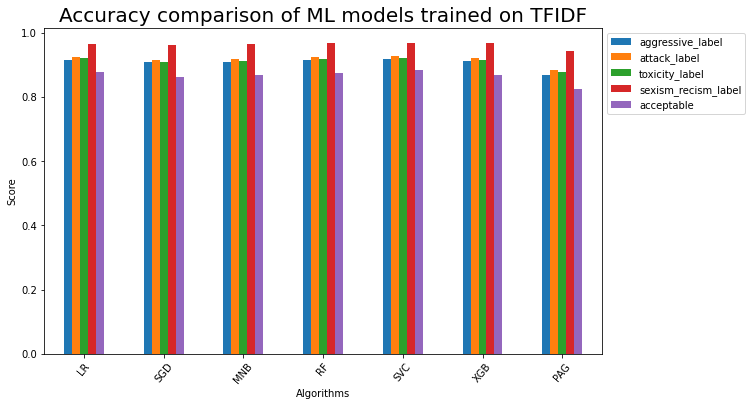

In [47]:
#plot comaparison 
acc_df.plot(x="models", y=["aggressive_label", "attack_label", "toxicity_label", "sexism_recism_label", "acceptable"], kind="bar",figsize=(10, 6))
plt.title("Accuracy comparison of ML models trained on TFIDF",fontsize=20)
plt.xlabel('Algorithms',fontsize=10)
plt.ylabel('Score',fontsize=10)
plt.xticks(rotation = 50)
plt.legend(loc = 2, bbox_to_anchor = (1,1),prop={'size': 10})
plt.show()

In [54]:
recall_df = pd.DataFrame(recall_data, index=['LR', 'SGD', 'MNB', 'RF', 'SVC', 'XGB', 'PAG'])
recall_df['models'] = recall_df.index

In [55]:
recall_df

,aggressive_label,attack_label,toxicity_label,sexism_recism_label,acceptable,models
LR,0.74595,0.75132,0.75803,0.71454,0.77010,LR
SGD,0.70530,0.71262,0.71565,0.69098,0.72559,SGD
MNB,0.72188,0.73004,0.72764,0.71357,0.75830,MNB
RF,0.75472,0.76570,0.76958,0.75319,0.77292,RF
SVC,0.75568,0.76412,0.76999,0.74116,0.77772,SVC
XGB,0.73709,0.74503,0.74952,0.74171,0.74590,XGB
PAG,0.75441,0.76578,0.77284,0.74128,0.75770,PAG


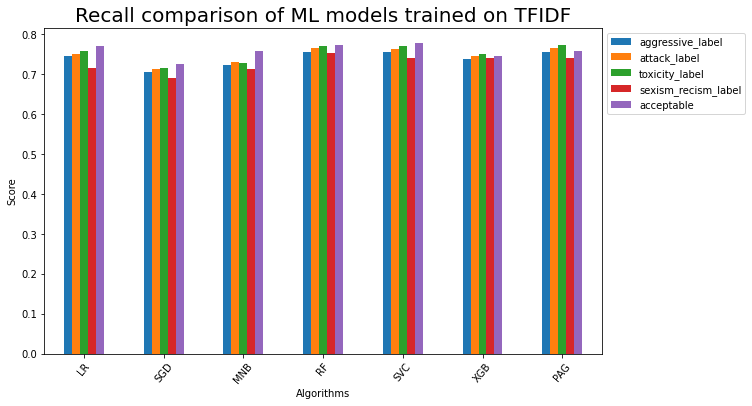

In [56]:
#plot comaparison 
recall_df.plot(x="models", y=["aggressive_label", "attack_label", "toxicity_label", "sexism_recism_label", "acceptable"], kind="bar",figsize=(10, 6))
plt.title("Recall comparison of ML models trained on TFIDF",fontsize=20)
plt.xlabel('Algorithms',fontsize=10)
plt.ylabel('Score',fontsize=10)
plt.xticks(rotation = 50)
plt.legend(loc = 2, bbox_to_anchor = (1,1),prop={'size': 10})
plt.show()

In [53]:
precision_df = pd.DataFrame(precision_data, index=['LR', 'SGD', 'MNB', 'RF', 'SVC', 'XGB', 'PAG'])
precision_df['models'] = precision_df.index
precision_df

,aggressive_label,attack_label,toxicity_label,sexism_recism_label,acceptable,models
LR,0.89154,0.89816,0.90220,0.91153,0.87071,LR
SGD,0.89809,0.90213,0.90195,0.91416,0.87737,SGD
MNB,0.88295,0.89045,0.89264,0.89753,0.85383,MNB
RF,0.87431,0.87839,0.87938,0.90528,0.85706,RF
SVC,0.89273,0.90107,0.90032,0.91701,0.87761,SVC
XGB,0.88145,0.88295,0.88895,0.90748,0.87132,XGB
PAG,0.73756,0.75255,0.75634,0.72415,0.75579,PAG


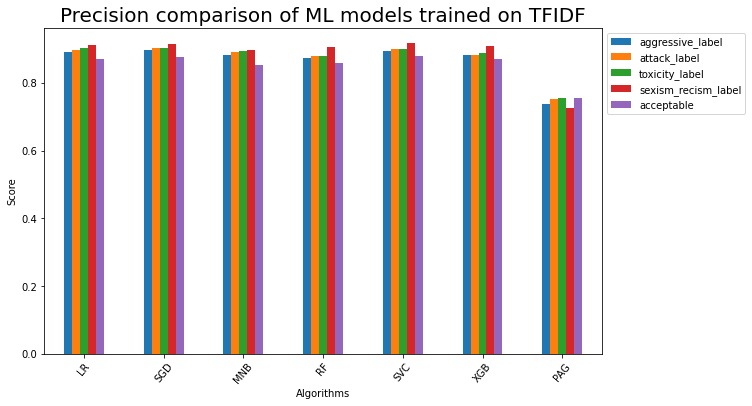

In [50]:
#plot comaparison 
precision_df.plot(x="models", y=["aggressive_label", "attack_label", "toxicity_label", "sexism_recism_label", "acceptable"], kind="bar",figsize=(10, 6))
plt.title("Precision comparison of ML models trained on TFIDF",fontsize=20)
plt.xlabel('Algorithms',fontsize=10)
plt.ylabel('Score',fontsize=10)
plt.xticks(rotation = 50)
plt.legend(loc = 2, bbox_to_anchor = (1,1),prop={'size': 10})
plt.show()

In [52]:
fscore_df = pd.DataFrame(fscore_data, index=['LR', 'SGD', 'MNB', 'RF', 'SVC', 'XGB', 'PAG'])
fscore_df['models'] = fscore_df.index
fscore_df

,aggressive_label,attack_label,toxicity_label,sexism_recism_label,acceptable,models
LR,0.81227,0.81820,0.82386,0.80110,0.81732,LR
SGD,0.79010,0.79625,0.79807,0.78705,0.79429,SGD
MNB,0.79433,0.80231,0.80174,0.79505,0.80324,MNB
RF,0.81013,0.81818,0.82082,0.82226,0.81282,RF
SVC,0.81851,0.82696,0.83007,0.81976,0.82465,SVC
XGB,0.80283,0.80815,0.81330,0.81626,0.80375,XGB
PAG,0.74589,0.75911,0.76450,0.73261,0.75674,PAG


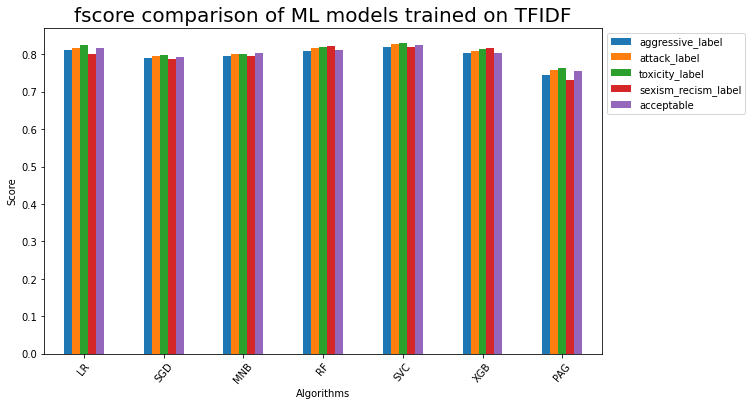

In [51]:
#plot comaparison 
fscore_df.plot(x="models", y=["aggressive_label", "attack_label", "toxicity_label", "sexism_recism_label", "acceptable"], kind="bar",figsize=(10, 6))
plt.title("fscore comparison of ML models trained on TFIDF",fontsize=20)
plt.xlabel('Algorithms',fontsize=10)
plt.ylabel('Score',fontsize=10)
plt.xticks(rotation = 50)
plt.legend(loc = 2, bbox_to_anchor = (1,1),prop={'size': 10})
plt.show()